# 4.2
## 1.
### Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Obter série de anos

In [2]:
seed_value = 100
years = pd.Series([i for i in range(1900, 2021)])
sampleyears1 = years.sample(n=30, replace=False, random_state=seed_value)

### Ler os dados

In [3]:
dados_lidos = pd.read_csv("CO_data.csv")

### Inspecionar os dados lidos

Nota: A análise destes dados já foi realizada na primeira parte do trabalho, pelo que nesta parte fica apenas uma "verificação" visual do carregamento dos dados.

In [4]:
dados_lidos.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Obter dados dos anos pretendidos para Portugal e Hungria

Vamos realizar a filtragem das linhas e colunas de uma única vez, pelo que precisamos de preparar os filtros previamente.
Optámos também por ter os dados em 2 datasets separados por País, neste caso não existe vantagem em ter apenas um único dataset para todos os dados. 

In [5]:
# Definição das condições de filtragem.
condicao_anos = dados_lidos.year.isin(list(sampleyears1))
condicao_2_paises = dados_lidos.country.isin(["Hungary", "Portugal"])


### Extrair dos dados lidos, os dados de trabalho de acordo com as condições de filtro.

Optámos por remover os registos que tenham valores ``NaN`` em qualquer uma das colunas.

In [6]:
# Filtrar
dados_extraidos = dados_lidos.loc[condicao_2_paises & condicao_anos, ["year", "gdp", "country"]]
# Alterar tabela
dados_trabalho = dados_extraidos.pivot_table(values=["gdp"], index=["year"], columns=["country"])
# Eliminar os NaN
dados_trabalho.dropna(inplace=True)
# Ajustar o index
dados_trabalho = dados_trabalho.droplevel(0, axis=1)

#### Confirmar o nosso dataset de trabalho

Pretendemos confirmar que temos as colunas necessárias. E que os valores ``NaN`` foram removidos.

In [7]:
print(f"Existem valores NaN ? {dados_trabalho.isnull().values.any()}")
dados_trabalho

Existem valores NaN ? False


country,Hungary,Portugal
year,,
1925,3.015027e+10,1.470129e+10
1926,2.888782e+10,1.460573e+10
1928,3.279348e+10,1.550832e+10
1929,3.387710e+10,1.719477e+10
1932,3.069479e+10,1.821253e+10
1933,3.348083e+10,1.943744e+10
1935,3.539191e+10,1.919456e+10
1936,3.774896e+10,1.773654e+10
1937,3.691067e+10,2.071620e+10


### Gráficos dos dados

Pela natureza dos dados, consideramos que a melhor de os visualizar é pela utilização de gráficos de dispersão.

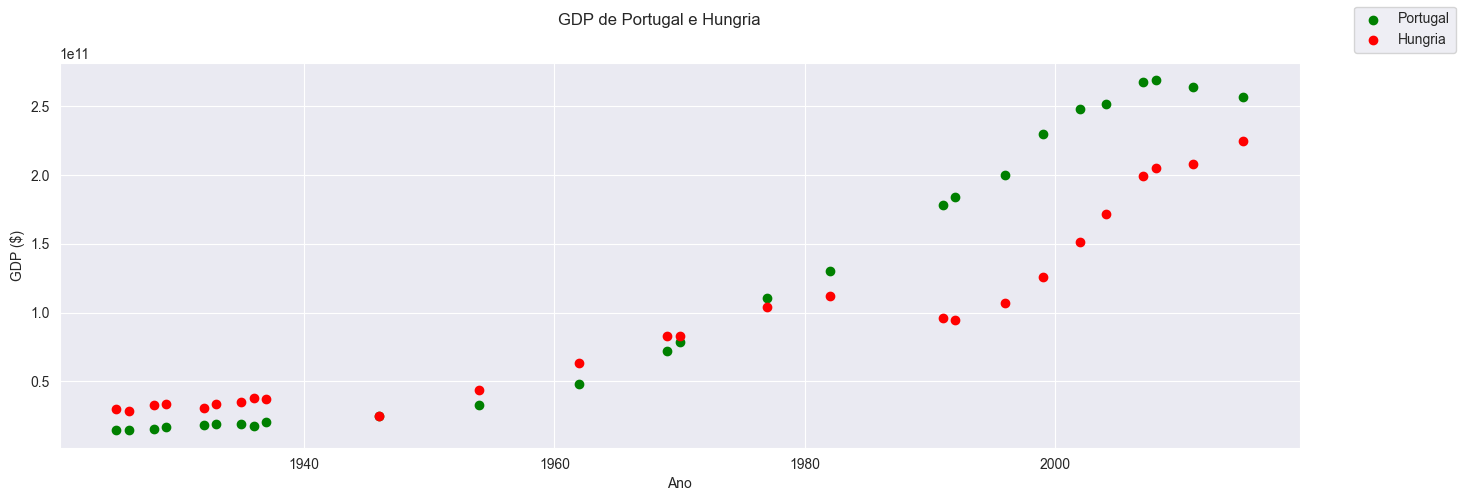

In [8]:
fig_scatter, axes_scatter = plt.subplots(figsize=(16, 5))
fig_scatter.suptitle("GDP de Portugal e Hungria")

plt_pt = axes_scatter.scatter(dados_trabalho.index, dados_trabalho.Portugal, color="green")
plt_hu = axes_scatter.scatter(dados_trabalho.index, dados_trabalho.Hungary, color="red")
_ = axes_scatter.set_xlabel("Ano")
_ = axes_scatter.set_ylabel("GDP ($)")
_ = fig_scatter.legend(("Portugal", "Hungria"), loc="upper right")

# fig_scatter.show()  # Em Jupyter pode apresentar um aviso.

In [9]:
#### Gráficos isolados (alternativa)

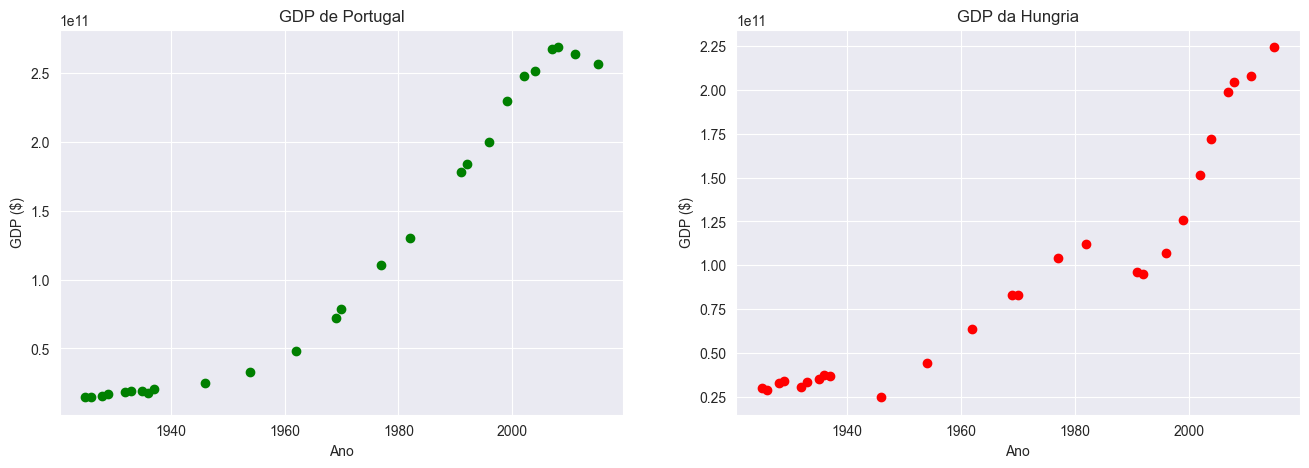

In [10]:
fig_scatter_alt, axes_scatter_alt = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Subplot com os dados de Portugal
plt_pt_alt = axes_scatter_alt[0].scatter(dados_trabalho.index, dados_trabalho.Portugal, color="green")
_ = axes_scatter_alt[0].set_title("GDP de Portugal")
_ = axes_scatter_alt[0].set_xlabel("Ano")
_ = axes_scatter_alt[0].set_ylabel("GDP ($)")

# Subplot com os dados dda Hungria
plt_hu_alt = axes_scatter_alt[1].scatter(dados_trabalho.index, dados_trabalho.Hungary, color="red")
_ = axes_scatter_alt[1].set_title("GDP da Hungria")
_ = axes_scatter_alt[1].set_xlabel("Ano")
_ = axes_scatter_alt[1].set_ylabel("GDP ($)")

# fig_scatter_alt.show()  # Em Jupyter pode apresentar um aviso.

### Cálcular a média amostral

In [11]:
# Média amostral de Portugal.
media_PT = dados_trabalho.Portugal.mean(axis=0)
print(f"Média amostral de Portugal: {media_PT:.3e}")

# Média amostral da Hungria.
media_HU = dados_trabalho.Hungary.mean(axis=0)
print(f"Média amostral da Hungria: {media_HU:.3e}")

Média amostral de Portugal: 1.154e+11
Média amostral da Hungria: 9.219e+10


### Normalidade

Este teste podia ser dispensado porque a amostra é de 30 valores, que é o limite para a utilização do teste *t-student*.
Para que o teste funcione foi necessário fazer a opçao de omitir os valores ``NaN`` usando ``nan_policy="omit"``.

In [12]:
statval_PT, p_value_PT = stats.normaltest(dados_trabalho.Portugal,  nan_policy="omit")
print(f"Portugal - pvalue: {p_value_PT:.3}")

statval_HU, p_value_HU = stats.normaltest(dados_trabalho.Hungary, nan_policy="omit")
print(f"Hungria - pvalue: {p_value_HU:.3}")

Portugal - pvalue: 0.00032
Hungria - pvalue: 0.17


Como o *p-value* de Portugal é inferior a 5% os dados não seguem distribuição normal.
Como o *p-value* da Hungria é superior a 5% os dados seguem distribuição normal. 

### Teste

As amostras são emparelhadas, não havendo assim necessidade de testar a variância das mesmas.

Utilizaçao de *t-student* à média, para amostras emparelhadas (dizem respeito aos mesmos anos).

## Hipotese

$$H_0: \bar X_{PT} \geq \bar X_{HU} \quad Vs \quad H_0: \bar X_{PT} < \bar X_{HU}$$

Para que o teste funcione foi necessário fazer a opçao de omitir os valores ``NaN`` usando ``nan_policy="omit"``.
Uma vez que pretendemos testar se o valor do GDP de Portugal é superior, e os respectivos dados são os primeiros dos argumentos a opção correta para a hipótese alternativa é: ``alternative="greater"``.   

In [13]:
resultado = stats.ttest_rel(dados_trabalho.Portugal, dados_trabalho.Hungary, nan_policy="omit", alternative="greater")
print(f"O valor de pvalue é {resultado.pvalue:.4f}")

O valor de pvalue é 0.0076


Como o valor do *p-value* é inferior a 0,05 rejeitamos a hipotese de que a média do GDP de Portugal é superior à média da Hungria.